In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

import time
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

def create_dataset(n=1250, nf=2, nr=0, ni=2, random_state=125):
    '''
    generate a new dataset with 
    n: total number of samples
    nf: number of features
    nr: number of redundant features (these are linear combinatins of informative features)
    ni: number of informative features (ni + nr = nf must hold)
    random_state: set for reproducibility
    '''
    X, y = make_classification( n_samples=n,
                                n_features=nf,
                                n_redundant=nr,
                                n_informative=ni,
                                random_state=random_state,
                                n_clusters_per_class=2)
    rng = np.random.RandomState(2)
    X += 3 * rng.uniform(size = X.shape)
    X = StandardScaler().fit_transform(X)
    return X, y

def plotter(classifier, X, X_test, y_test, title, ax):
    # plot decision boundary for given classifier
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), 
                            np.arange(y_min, y_max, plot_step)) 
    Z = classifier.predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    if ax:
        ax.contourf(xx, yy, Z, cmap = plt.cm.Paired)
        ax.scatter(X_test[:, 0], X_test[:, 1], c = y_test)
        ax.set_title(title)
    else:
        plt.contourf(xx, yy, Z, cmap = plt.cm.Paired)
        plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test)
        plt.title(title)


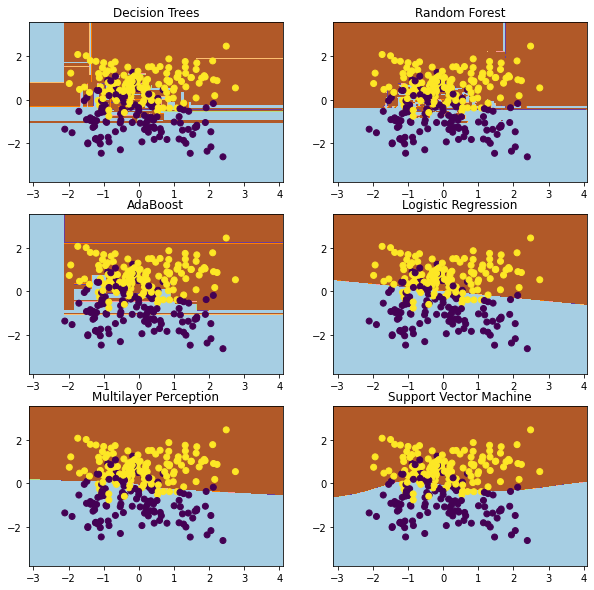

In [2]:
#Question1 (a)
X, y = (create_dataset(n=1250, nf=2, nr=0, ni=2, random_state=125))
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=45)
clf0 = DecisionTreeClassifier()
clf1 = RandomForestClassifier()
clf2 = AdaBoostClassifier()
clf3 = LogisticRegression()
clf4 = MLPClassifier()
clf5 = SVC()

clfs = [clf0, clf1, clf2, clf3, clf4, clf5]
title = ['Decision Trees', 'Random Forest', 'AdaBoost', 'Logistic Regression', 'Multilayer Perception', 
         'Support Vector Machine']
fig, ax = plt.subplots(3,2, figsize=(10,10))

for i in range(len(clfs)):
    clfs[i].fit(X_train, y_train)
    plotter(clfs[i], X, X_test, y_test, title[i], ax[i//2,i%2])  #i//2:row i%2: col

In [3]:
#Question1 (b) and (c)
train_sizes = [50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
total_accuracy = []
total_time = []
for i in range(len(clfs)):     #for each classifier
#     print(title[i])
    temp_a = []  #temp accuracy
    temp_t = []  #temp time
    for size in train_sizes:        #for each train_size
#         print(size)
#         print('train_size = ', size)
        accuracy = 0
        time1 = time.time()
        if size < 1000:
            for iteration in range(10):  #for each iteration
                sub_X_train, sub_X_test, sub_y_train, sub_y_test = train_test_split(X_train,y_train,train_size = size)
                clfs[i].fit(sub_X_train, sub_y_train)
                accuracy += clfs[i].score(X_test,y_test)
        else:  #size == 1000, use whole train_set in (a)
            for iteration in range(10):
                sub_X_train, sub_y_train = X_train, y_train
                clfs[i].fit(sub_X_train, sub_y_train)
                accuracy += clfs[i].score(X_test,y_test)
        time2 = time.time()
        accuracy /= 10      #average accuracy in each iteration
        temp_a.append(accuracy)
        temp_t.append(np.log((time2 - time1) / 10)) #log of average time in each iteration
    total_accuracy.append(temp_a)
    total_time.append(temp_t)

/Users/izual/anaconda3/envs/9444env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/izual/anaconda3/envs/9444env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/izual/anaconda3/envs/9444env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/izual/anaconda3/envs/9444env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterati

/Users/izual/anaconda3/envs/9444env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/izual/anaconda3/envs/9444env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/izual/anaconda3/envs/9444env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/izual/anaconda3/envs/9444env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterati

/Users/izual/anaconda3/envs/9444env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/izual/anaconda3/envs/9444env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/izual/anaconda3/envs/9444env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


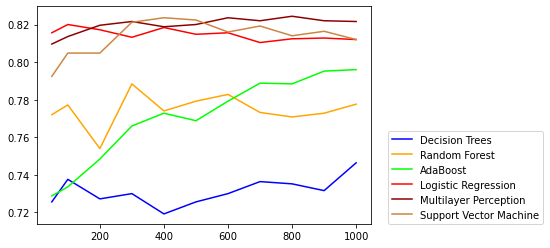

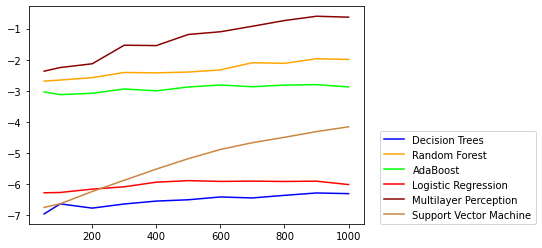

In [4]:
colors = ['blue', 'orange', 'lime', 'red' , 'darkred', 'peru']

for i in range(len(total_accuracy)):
    plt.plot(train_sizes, total_accuracy[i], color = colors[i], label = title[i])
    plt.legend(bbox_to_anchor=(1.05, 0), loc=3, borderaxespad=0)
    ### reference: https://blog.csdn.net/Poul_henry/article/details/82533569
plt.show()
for i in range(len(total_time)):
    plt.plot(train_sizes, total_time[i], color = colors[i], label = title[i])
    plt.legend(bbox_to_anchor=(1.05, 0), loc=3, borderaxespad=0)
plt.show()

In [5]:
##q1(d)
X, y = create_dataset(n=2000, nf = 20, nr = 12, ni = 8, random_state = 25)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5,random_state=15)
DT_clf = DecisionTreeClassifier(random_state = 0)
DT_clf.fit(X_train, y_train)
train_ac = DT_clf.score(X_train,y_train)
test_ac = DT_clf.score(X_test, y_test)
print('Accuracy on the train set: ', train_ac)
print('Accuracy on the test set: ', test_ac)

Accuracy on the train set:  1.0
Accuracy on the test set:  0.814


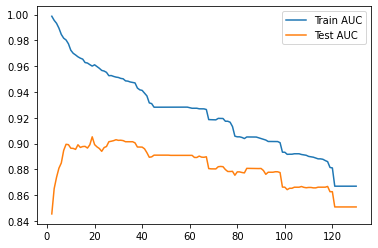

In [6]:
##q1(e)
import sklearn

leafs = [i for i in range(2, 131)]
train_AUC = []
test_AUC = []
for leaf in leafs:
    DT_clf = DecisionTreeClassifier(min_samples_leaf = leaf, random_state = 0)
    DT_clf.fit(X_train, y_train)
    train_predict = DT_clf.predict_proba(X_train)[:,1]
    trainauc = sklearn.metrics.roc_auc_score(y_train,train_predict)
    
    test_predict = DT_clf.predict_proba(X_test)[:,1]
    testauc = sklearn.metrics.roc_auc_score(y_test, test_predict)
    train_AUC.append(trainauc)
    test_AUC.append(testauc)
plt.plot(leafs, train_AUC,label = 'Train AUC')
plt.plot(leafs, test_AUC, label = 'Test AUC')
plt.legend()
plt.show()

The max score is  0.9025196654853911 , with k =  24


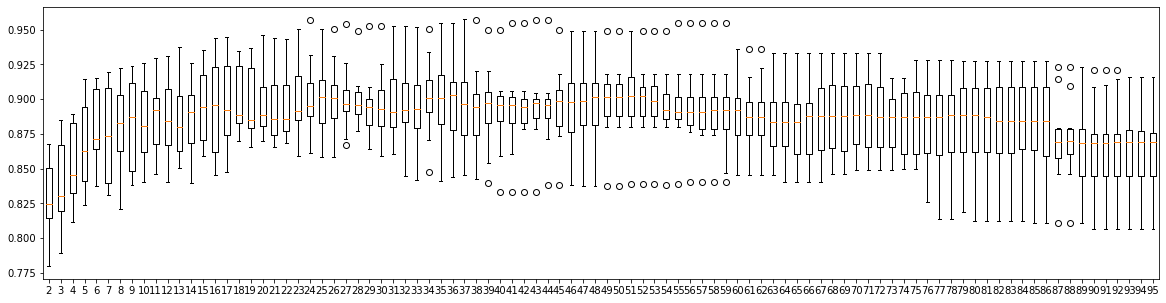

In [15]:
##q1 (f)
leafs = [i for i in range(2, 96)]
folds = 10
total_auc = []
max_score = 0
max_k = -1
for leaf in leafs:
    temp_auc = []
    current_auc = 0
    for i in range(folds):
        DT_clf = DecisionTreeClassifier(min_samples_leaf = leaf, random_state = 0)
        begin = int((len(X_train) / folds) * i)
        end = int((len(X_train) / folds) * (i + 1))
        cv_X = X_train[begin:end]
        cv_y = y_train[begin:end]
        other_X = np.vstack((X_train[0:begin],X_train[end:]))
        other_y = np.hstack((y_train[0:begin],y_train[end:]))
        DT_clf.fit(other_X, other_y)
        cv_predict = DT_clf.predict_proba(cv_X)[:,1]
        cvauc = sklearn.metrics.roc_auc_score(cv_y, cv_predict)
        temp_auc.append(cvauc)
        current_auc += cvauc
    total_auc.append(temp_auc)
    if current_auc / 10 > max_score:      #average auc
        max_score = current_auc / 10
        max_k = leaf          #k with max average auc

print('The max score is ', max_score, ', with k = ', max_k)
plt.figure(figsize = (20,5))
plt.tight_layout()
plt.boxplot(total_auc, labels = leafs)
plt.show()

In [8]:
DT_clf = DecisionTreeClassifier(min_samples_leaf = 24, random_state = 0)
DT_clf.fit(X_train, y_train)
train_ac = DT_clf.score(X_train,y_train)
test_ac = DT_clf.score(X_test, y_test)
print(train_ac, test_ac)

0.881 0.825


In [9]:
##(g)
from sklearn.model_selection import GridSearchCV
#leafs = [i for i in range(2, 96)]
grid = GridSearchCV(DecisionTreeClassifier(random_state = 0),param_grid={'min_samples_leaf': leafs},cv=10,
                   scoring = 'roc_auc')
grid.fit(X_train, y_train)
print(grid.best_params_)
train_ac = grid.score(X_train,y_train)
test_ac = grid.score(X_test, y_test)
print(train_ac, test_ac)

{'min_samples_leaf': 28}
0.952045204520452 0.9022368384203304


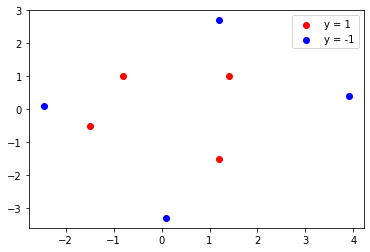

In [10]:
##question 2 (a)
X = np.array([[-0.8, 1], [3.9, 0.4], [1.4,1], [0.1,-3.3], [1.2,2.7],[-2.45,0.1], [-1.5,-0.5],
             [1.2,-1.5]])
y = np.array([1,-1,1,-1,-1,-1,1,1])
color = {-1: 'b', 1:'r'}
for i in range(len(X)):
    plt.scatter(X[i][0], X[i][1], c = color[y[i]])
plt.legend(('y = 1', 'y = -1'))
plt.show()

In [11]:

#if set m = 0, d = 1, k(x,y) = (x.T * y)
#based on 2.1, the data is linearly unseparable
#then set m = 0, d = 2, k(x,y) = (x.T * y) ** 2
#the 3d representation:
new = []
for i in range(len(X)):
    new.append([X[i][0] ** 2, np.sqrt(2) * X[i][0] * X[i][1], X[i][1] ** 2])
new = np.array(new)

# from mpl_toolkits.mplot3d import Axes3D 
# fig = plt.figure()
# ax = Axes3D(fig)
# for i in range(len(new)):
#     ax.scatter(new[i][0], new[i][1], new[i][2], c = color[y[i]])


[[ 6.40000000e-01 -1.13137085e+00  1.00000000e+00]
 [ 1.52100000e+01  2.20617316e+00  1.60000000e-01]
 [ 1.96000000e+00  1.97989899e+00  1.00000000e+00]
 [ 1.00000000e-02 -4.66690476e-01  1.08900000e+01]
 [ 1.44000000e+00  4.58205194e+00  7.29000000e+00]
 [ 6.00250000e+00 -3.46482323e-01  1.00000000e-02]
 [ 2.25000000e+00  1.06066017e+00  2.50000000e-01]
 [ 1.44000000e+00 -2.54558441e+00  2.25000000e+00]]


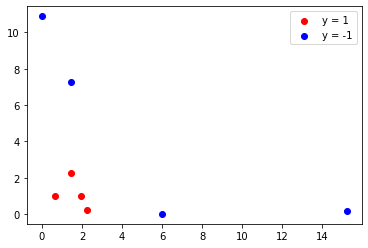

In [12]:
####(b)
print(new)
a = new[:,0]
b = new[:,1]
c = new[:,2]

#choose a and c, i.e. the 1st and the 3rd in the 3-d vector 'new'
d = np.array([a,c]).T
for i in range(len(X)):
    plt.scatter(d[i][0], d[i][1], c = color[y[i]])
plt.legend(('y = 1', 'y = -1'))
plt.show()

In [34]:
###(c)
w = np.ones(4)
new_X = np.insert(new, 0, values = np.ones(len(new)), axis = 1)  #insert a col with values = 1 to X
learning_rate = 0.2
#print(new_X)
flag = 0

total_w = []
total_w.append(w)     #initialized with [(1,1,1,1)]
iteration_list = []
iteration_list.append(0)    #initialized with [0] 
iteration = 0
while(flag == 0):
    flag = 1
    for i in range(len(new_X)):
        value = np.dot(w, new_X[i])
        iteration += 1
        if value * y[i] > 0:        #if classified rightly
            continue
        else:          #misclassified
            flag = 0
            w = w + learning_rate * y[i] * new_X[i]
            print('iteration = ', iteration, '\nw = ', w)
            iteration_list.append(iteration)
            total_w.append(w)
print('Final weight vector: ', w)

iteration =  2 
w =  [ 0.8        -2.042       0.55876537  0.968     ]
iteration =  3 
w =  [ 1.         -1.65        0.95474517  1.168     ]
iteration =  4 
w =  [ 0.8        -1.652       1.04808326 -1.01      ]
iteration =  7 
w =  [ 1.        -1.202      1.2602153 -0.96     ]
iteration =  8 
w =  [ 1.2        -0.914       0.75109841 -0.51      ]
iteration =  9 
w =  [ 1.4        -0.786       0.52482424 -0.31      ]
iteration =  13 
w =  [ 1.2        -1.074      -0.39158615 -1.768     ]
iteration =  15 
w =  [ 1.4        -0.624      -0.17945411 -1.718     ]
iteration =  16 
w =  [ 1.6        -0.336      -0.68857099 -1.268     ]
iteration =  19 
w =  [ 1.8        0.056     -0.2925912 -1.068    ]
iteration =  22 
w =  [ 1.6        -1.1445     -0.22329473 -1.07      ]
iteration =  23 
w =  [ 1.8       -0.6945    -0.0111627 -1.02     ]
iteration =  24 
w =  [ 2.         -0.4065     -0.52027958 -0.57      ]
iteration =  27 
w =  [ 2.2        -0.0145     -0.12429978 -0.37      ]
iteration 

In [36]:
#print the iteration table
import pandas as pd
df = pd.DataFrame(columns=('Iteration No.', 'w0', 'w1', 'w2', 'w3'))
df.head()
iteration = 0
i = 0
for item in total_w:
    df.loc[i] = {'Iteration No.': iteration_list[i] ,'w0':item[0], 'w1':item[1], 'w2':item[2], 'w3':item[3]}
    iteration += 1
    i += 1
df.head(30)

,Iteration No.,w0,w1,w2,w3
0,0,1.0,1.0000,1.000000,1.000
1,2,0.8,-2.0420,0.558765,0.968
2,3,1.0,-1.6500,0.954745,1.168
3,4,0.8,-1.6520,1.048083,-1.010
4,7,1.0,-1.2020,1.260215,-0.960
5,8,1.2,-0.9140,0.751098,-0.510
6,9,1.4,-0.7860,0.524824,-0.310
7,13,1.2,-1.0740,-0.391586,-1.768
8,15,1.4,-0.6240,-0.179454,-1.718
9,16,1.6,-0.3360,-0.688571,-1.268


In [37]:
#if the perceptron has converged
for i in range(len(X)):
    print(X[i])
    print(new[i])
    value = np.dot(new_X[i], w) * y[i]
    print(value > 0)

[-0.8  1. ]
[ 0.64       -1.13137085  1.        ]
True
[3.9 0.4]
[15.21        2.20617316  0.16      ]
True
[1.4 1. ]
[1.96       1.97989899 1.        ]
True
[ 0.1 -3.3]
[ 1.00000000e-02 -4.66690476e-01  1.08900000e+01]
True
[1.2 2.7]
[1.44       4.58205194 7.29      ]
True
[-2.45  0.1 ]
[ 6.0025     -0.34648232  0.01      ]
True
[-1.5 -0.5]
[2.25       1.06066017 0.25      ]
True
[ 1.2 -1.5]
[ 1.44       -2.54558441  2.25      ]
True
